# Chap 13. 회귀분석
## 13.1 서론
- 두 개 이상의 변수에 대하여 관측값을 얻게 됨

1) 변수들이 서로 관련이 있는가

2) 관련이 있다면 얼마나 밀접하게 관련있는가

3) 관심이 있는 변수의 값을 그 외 다른 변수의 값으로부터 예측할 수 있는가

## 13.2 단순선형회귀모형
x, y의 관계를 규명하거나, x로부터 y를 예측하게 된다
- x: 독립변수, 설명변수 => 실험하는 사람에 의하여 통제되어 독립적으로 주어짐
- y: 종속변수, 반응변수 => 독립변수와 오차에 의해서 결정
$$ y=\beta_0 + \beta_1 x $$
- 관계 : 변수 x가 1단위 증가하면 변수 y는 x의 위치와 상관없이 $\beta_1$만큼 증가
- 실제 관측된 두 변수의 자룟값은 직선위에 놓인 점들이 오차와 같은 설명될 수 없는 요인에 의하여 변동된 것으로 보며, 이 오차부분은 관측될 수 없지만 어떤 확률적 성질을 갖는다고 보고 문제에 접근
    - 종속변수 : 독립변수와의 직선관계에 의하여 설명되는 상수 부분과, 독립변수로는 설명되지 않는 오차의 합
> **단순선형회귀모형**
>
> 확률변수 Y가 독립변수 x와 오차라는 $\epsilon$에 의해 설명되는 종속변수라고 하면, 다음과 같이 표현 가능 $$ Y_i = \beta_0 + \beta_1 x_i + \epsilon_i,\quad i=1,2,...,n $$
>
> 조건
> 1) $\beta_1, \beta_0$은 직선식을 결정하는 미지의 회귀 모수.
>
> 2) 오차 $\epsilon_i$들은 서로 독립이며 평균이 0, 분산이 $\sigma^2$인 정규분포를 따르는 확률변수.
>
> 3) $Y_i$는 독립변수를 $x_i$로 고정시켰을 때의 종속변수의 값

- 실제 관측값은 직선상의 점 $\beta_0+\beta_1 x_i$가 정규분포를 따르는 오차 $\epsilon_i$에 의하여 변동된 것으로 해석

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.formula.api as sm
from statsmodels import regression
import statsmodels

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc, rcParams

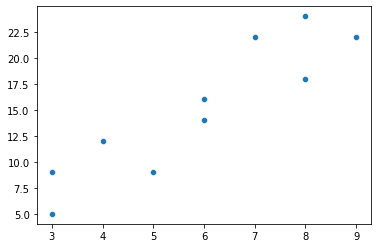

In [2]:
# example 1
x = [3,3,4,5,6,6,7,8,8,9]
y = [9,5,12,9,14,16,22,18,24,22]

sns.scatterplot(x=x,y=y);

In [3]:
# prob 2.2
a = 10
b = (1-a)/3
print(a,b)

10 -3.0


In [4]:
# prob 2.8
beta0 = 8
beta1 = -6
sigma = 4

In [5]:
# prob 2.10
# 1
# y = 2 + 4x + epsilon
print(6, 9)

6 9


In [6]:
# 2
print(10, 9)

10 9


## 13.3 최소제곱추정법을 이용한 모수의 추정
- 최소제곱추정법 : 실제 관측치와 선형회귀예측직선 값의 차이 ($d_i=y_i-(b_0+b_1x_i))$의 제곱합을 최소화하는 모수를 찾는 것
$$D = \sum^n_{i=1}d_i^2=\sum^n_{i=1}(y_i-(b_0+b_1x_i))^2, \\ estimate\ \beta_0,\ \beta_1$$
- 정의
$$\bar{x}=\frac{1}{n}\sum x_i,\ \bar{y}=\frac{1}{n}\sum y_i \\ S_{xx}=\sum(x_i-\bar{x})^2=\sum x^2_i - n\bar{x}^2 = \sum x_i^2-\frac{(\sum x_i)^2}{n}\\ S_{yy}=\sum(y-\bar{y})^2=\sum y_i^2 - n\bar{y}^2=\sum y_i^2-\frac{(\sum y_i)^2}{n} \\ S_{xy} = \sum(x_i-\bar{x})(y_i-\bar{y})=\sum x_iy_i - n\bar{x}\bar{y} - \sum x_iy_i - \frac{(\sum x_i)(\sum y_i)}{n}$$
- 단순선형회귀모형의 $\beta_0,\ \beta_1$의 최소제곱추정량은 D를 편미분한여 다음과 같이 얻을 수 있다
$$\hat{\beta_1}=\frac{S_{xy}}{S_{xx}},\quad \hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}\\ \hat{y}=\hat{\beta_0}+\hat{\beta_1}x$$
- 잔차 : 관측값과 추정량 사이의 차이
$$ 예측값:\ \hat{y_i}=\hat{\beta_0}+\hat{\beta_1}x_i \\ 잔차:\ \epsilon_i=y_i-\hat{y_i}=y_i-(\hat{\beta_0}+\hat{\beta_1}x_i) $$
- 단순선형회귀모형에서 최소제곱추정량에 의한 잔차는 양수 또는 음수를 갖게 되고 잔차의 합은 0이 된다 $\sum e_i=0$
- 잔차가 오차의 추정량이므로, 오차의 분산을 측정하기 위해 관측되지 않은 확률변수인 오차 대신에 잔차를 사용한다. 잔차제곱합 이용
$$잔차제곱합: SSE=\sum e^2_i = S_{yy}-\frac{S_{xy}^2}{S_{xx}}$$
- 오차의 분산 $\sigma^2$의 추정량으로 잔차제곱합을 n-2로 나눈 값 이용 : 평균제곱오차
$$s^2 = MSE = \frac{SSE}{n-2} $$
    - 오차분산의 추정량은 두 개의 모수($\beta_0,\ \beta_1$)을 추정하고 남은 n-2가 SSE의 자유도


In [7]:
# example 2
x_bar = np.mean(x) ; y_bar = np.mean(y)
s_xx = np.std(x,ddof=1) ** 2 * (len(x)-1)
s_yy = np.std(y,ddof=1) ** 2 * (len(y)-1)
s_xy = np.sum(np.multiply(x,y)) - np.sum(x) * np.sum(y)/len(y)

beta_1 = s_xy / s_xx
beta_0 = y_bar - beta_1 * x_bar

print(f"y = {beta_0:.4f} + {beta_1:.4f}x")

y_hat = beta_0 + np.multiply(beta_1,x)
sse = np.sum(np.diff([y_hat, y], axis=0)**2)
s_hat = sse / (len(y_hat)-2)
print(sse, s_hat)

y = -1.0709 + 2.7408x
63.65281173594132 7.956601466992665


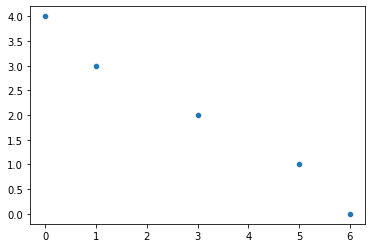

In [8]:
# prob 3.2
x = [0,1,6,3,5]
y = [4,3,0,2,1]
# 1
sns.scatterplot(x=x,y=y);

y = 3.8462 + -0.6154x
[3.84615385 3.23076923 0.15384615 2.         0.76923077]


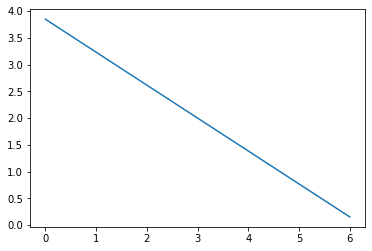

In [9]:
# 3
x_bar = np.mean(x) ; y_bar = np.mean(y)
s_xx = np.sum(np.power(x,2)) - np.sum(x)**2/len(x)
s_yy = np.sum(np.power(y,2)) - np.sum(y)**2/len(y)
s_xy = np.sum(np.multiply(x,y)) - np.sum(x) * np.sum(y) / len(y)

beta_1 = s_xy / s_xx ; beta_0 = y_bar - beta_1 * x_bar
print(f"y = {beta_0:.4f} + {beta_1:.4f}x")

y_hat = beta_0 + np.multiply(beta_1,x)
print(y_hat)
sns.lineplot(x=x, y=y_hat);

y = 5.4286 + -0.6071x


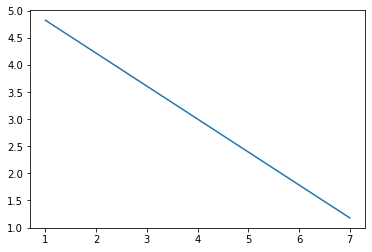

In [10]:
# prob 3.4
x = [1,2,3,5,6,7] ; y = [4,6,3,1,3,1]
# 1
x_bar = np.mean(x) ; y_bar = np.mean(y)
s_xx = np.sum(np.power(x,2)) - np.sum(x)**2/len(x)
s_yy = np.sum(np.power(y,2)) - np.sum(y)**2/len(y)
s_xy = np.sum(np.multiply(x,y)) - np.sum(x) * np.sum(y) / len(y)

beta_1 = s_xy / s_xx ; beta_0 = y_bar - beta_1 * x_bar
print(f"y = {beta_0:.4f} + {beta_1:.4f}x")

y_hat = beta_0 + np.multiply(beta_1,x)
sns.lineplot(x=x,y=y_hat);

In [11]:
# 2
print(beta_0 + beta_1 * 6)

1.7857142857142865


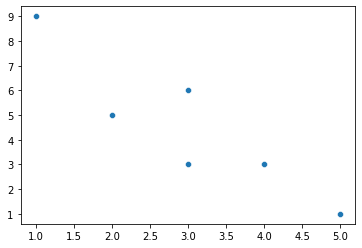

In [12]:
# prob 3.6
x = [1,2,3,3,4,5]
y = [9,5,6,3,3,1]
# 1
sns.scatterplot(x=x, y=y);

In [13]:
# 2
x_bar = np.mean(x) ; y_bar = np.mean(y)
s_xx = np.sum(np.power(x,2)) - np.sum(x)**2/len(x)
s_yy = np.sum(np.power(y,2)) - np.sum(y)**2/len(y)
s_xy = np.sum(np.multiply(x,y)) - np.sum(x) * np.sum(y) / len(y)

print(x_bar, y_bar, s_xx, s_yy, s_xy)

3.0 4.5 10.0 39.5 -18.0


In [14]:
# 3 
beta_1 = s_xy / s_xx ; beta_0 = y_bar - beta_1 * x_bar
print(f"y = {beta_0:.4f} + {beta_1:.4f}x")

y = 9.9000 + -1.8000x


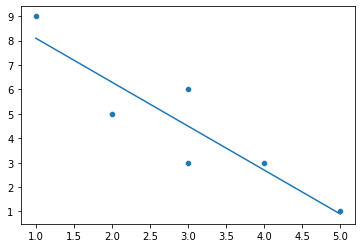

In [15]:
# 4
y_hat = beta_0 + np.multiply(beta_1, x)
sns.scatterplot(x=x, y=y);
sns.lineplot(x=x, y=y_hat);

plt.show()

In [16]:
# prob 3.8 #####
n = 14 ; x_bar = 3.5; y_bar = 2.32
s_xx = 10.82 ; s_yy = 1.035 ; s_xy = 2.677

# 1
beta_1 = s_xy / s_xx ;
beta_0 = y_bar - beta_1 * x_bar
print(f"y = {beta_0:.4f} + {beta_1:.4f}x")

y = 1.4541 + 0.2474x


In [17]:
# 2, 3
y_hat = beta_0 + np.multiply(beta_1, x)
sse = np.sum(np.diff([y_hat, y], axis=0)**2)
s_hat = sse / (len(y_hat)-2)
print(sse, s_hat)

80.86133791790378 20.215334479475946


In [18]:
# prob 3.10
x_bar = 156; y_bar = 1178 ; n = 20
x2_sum = 1262 ; y2_sum = 69390; xy_sum = 9203

s_xx = x2_sum - n * (x_bar**2)
s_yy = y2_sum - n * (y_bar**2)
s_xy = xy_sum - n * x_bar * y_bar
beta_1 = s_xy / s_xx 
beta_0 = y_bar - beta_1 * x_bar
print(f"y = {beta_0:.4f} + {beta_1:.4f}x")

y = -0.1050 + 7.5520x


In [19]:
# prob 3.12
path = '../data/pstat/예제, 연습문제/'
data = pd.read_excel(path + 'ch4.xlsx',sheet_name='3.4',header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   수소(ppm)  11 non-null     float64
 1   탄소(ppm)  11 non-null     float64
dtypes: float64(2)
memory usage: 304.0 bytes


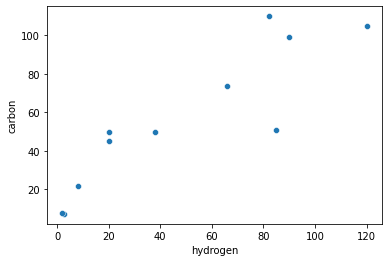

In [20]:
# 1
data = data.rename(columns={'수소(ppm)':'hydrogen', '탄소(ppm)': 'carbon'})
sns.scatterplot(x='hydrogen', y='carbon', data=data);

y = 18.0593 + 0.7912x
62.367037926250646


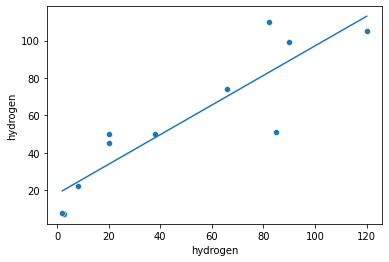

In [21]:
# 2
x = data['hydrogen'] ; y = data['carbon']
x_bar = np.mean(x) ; y_bar = np.mean(y)
s_xx = np.sum(np.power(x,2)) - np.sum(x)**2/len(x)
s_yy = np.sum(np.power(y,2)) - np.sum(y)**2/len(y)
s_xy = np.sum(np.multiply(x,y)) - np.sum(x) * np.sum(y) / len(y)

beta_1 = s_xy / s_xx ; beta_0 = y_bar - beta_1 * x_bar
print(f"y = {beta_0:.4f} + {beta_1:.4f}x")

y_hat = beta_0 + np.multiply(beta_1,x)
sns.lineplot(x=x,y=y_hat);
sns.scatterplot(x=x, y=y);

print(beta_0 + beta_1 * 56)

In [22]:
### prob 3.14

In [23]:
### prob 3.15

In [24]:
### prob 3.16

In [25]:
### prob 3.17

## 13.4 단순선형회귀모형에서의 추론
$$Y_i = \beta_0 + \beta_1x_i + \epsilon_i$$
- 오차$\epsilon_i$가 평균이 0이고 분산이 $\sigma^2$인 정규분포를 따르고, $\epsilon_1,\dots, \epsilon_n$이 서로 독립이라고 가정할 때, 추정회귀직선은 편차의 제곱합을 최소로 하는 모수를 선탠하여 얻은 값
- 추정직선은 주어진 자료로부터 얻은 값이므로 주어진 x값의 구간에서만 그 관계가 유효하다. 값의 구간을 훨씬 넘어간 값에 대해서는 관계를 확장할 수 없다.

### 기울기 $\beta_1$
- 추정량 $\beta_1$ : 정규분포를 따르는 관측값들의 선형결합 ($\hat{\beta_1}=\sum^n_{i=1}w_i y_i$)으로 이루어져 있으므로 정규분포를 따르게 되고, 평균은 $\beta_1$, 분산은 $\frac{\sigma^2}{S_{xx}}$이 된다.
- $\beta_1$의 추론은 10장의 모평균 추론과 비슷
> **$\hat{\beta_1}$의 표준오차**
> $$S.E.(\hat{\beta_1})=\frac{\sigma}{\sqrt{S_{xx}}}$$
> 
> 단, 오차의 표준편차가 알려져 있지 않을 떄는 그 자리에 $s=\sqrt\frac{SSE}{n-2}$를 대입하여 표준오차 추정
- 최소제곱 추정량을 $\frac{추정량-모수}{추정된 추정량의 표준오차}$의 형태로 표준화하면, t분포를 따르고 분포는 SSE의 자유도가 된다.
> **$\hat{\beta_1}$의 표본분포**
> $$t=\frac{(\hat{\beta_1}-\beta_1)}{\frac{s}{\sqrt{S_{xx}}}}\sim t(n-2)$$
- 오차의 분산 $\sigma^2$값이 알려져 있다면 표준정규분포를 사용하나, 실제로 오차의 분산이 알려진 경우는 거의 없으므로, 오차의 분산이 알려지지 않은 경우만 다룰 것
> **기울기 $\beta_1$에 관한 추론**
>
> $\beta_1$의 $100(1-\alpha)$ 신뢰구간 : $\hat{\beta_1} \pm t_{\alpha/2}(n-2)\times\frac{s}{\sqrt{S_{xx}}}$
>
> 가설 $H_0$ : $\beta_1=\beta_{10}$에 대한 검정(유의수준 $\alpha$):
>$$ 검정통계량:\ t=\frac{\hat{\beta_1}-\beta_{10}}{\frac{s}{\sqrt{S_{xx}}}} $$
> t통계량은 $H_0$가 맞을 때 자유도가 n-2인 t분포를 따른다.
> 각 대립가설에 대한 기각역:
> $$H_1:\beta_1 > \beta_{10} \quad\quad R:t\geq t_{\alpha}(n-2) \\ H_1:\beta_1 < \beta_{10} \quad\quad R:t\leq -t_{\alpha}(n-2) \\ H_1:\beta_1 \neq \beta_{10} \quad\quad R:|t|\geq t_{\alpha/2}(n-2)$$
- $\beta_1=0$인지 아닌지는 관심의 대상이 된다. 기울기가 0이면 반응변수의 기댓값은 $E(Y)=\beta_0+\beta_1x=\beta_0$이 되고, 독립변수가 종속변수를 예측하는 데 전혀 정보를 제공하지 못함
- 귀무가설이 기각되지 않는 경우 : 종속변수가 독립변수에 의해 설명될 수 없다??
    - 두 변수 사이에 직선관계가 존재하지만 자료에서 얻어진 x갑의 범위 내에서는 직선관계가 나타내지 않을 수 있다
    - 두 변수 사이 곡선관계가 존재한다면 부적절한 모형을 바탕으로 검정한 것
    
    => 따라서 기각되지 않는 경우 산점도를 통해 곡선관계를 확인하여야 하며, 기가되지 않는 경우 두 변수 사이에 관계가 없는 것이 아닌, 직선관계가 없다고 해석해야 함

In [26]:
# example 3
x = [3,3,4,5,6,6,7,8,8,9]
y = [9,5,12,9,14,16,22,18,24,22]

x_bar = np.mean(x) ; y_bar = np.mean(y)
s_xx = np.std(x,ddof=1) ** 2 * (len(x)-1)
s_yy = np.std(y,ddof=1) ** 2 * (len(y)-1)
s_xy = np.sum(np.multiply(x,y)) - np.sum(x) * np.sum(y)/len(y)

beta_1 = s_xy / s_xx
beta_0 = y_bar - beta_1 * x_bar

print(f"y = {beta_0:.4f} + {beta_1:.4f}x")

y_hat = beta_0 + np.multiply(beta_1,x)
sse = np.sum(np.diff([y_hat, y], axis=0)**2)
s_hat = sse / (len(y_hat)-2)
print(sse, s_hat)

y = -1.0709 + 2.7408x
63.65281173594132 7.956601466992665


In [27]:
alpha = 0.05

t_alpha = stats.t.ppf(1-alpha/2, df=len(y)-2)
print(beta_1, t_alpha * np.sqrt(s_hat) / np.sqrt(s_xx))

2.740831295843521 1.017096665429011


In [28]:
# exmaple 4
t_val = beta_1 / (np.sqrt(s_hat)/np.sqrt(s_xx))
t_alpha = stats.t.ppf(1-alpha, df=len(y)-2)
print(t_val, t_alpha)

6.214127443804077 1.8595480375228424


### 절편$\beta_0$에 관한 추론
> $\hat{\beta_0}$의 추정된 표준오차와 표본분포
> $$추정된 표준오차 : s\sqrt{\frac{1}{n}+\frac{\bar{x}^2}{S_{xx}}}$$
> $$표본분포 : t=\frac{(\hat{\beta_0}-\beta_0)}{s\sqrt{\frac{1}{n}+\frac{\bar{x}^2}{S_{xx}}}} \approx t(n-2) $$
- $\beta_1$ 검정 경우와 검정툥계량의 분포가 같으므로 기각역은 똑같이 구할 수 있다.

> **절편$\beta_0$에 관한 추론**
>
> $100(1-\alpha)%$의 신뢰구간 : $\hat{\beta_0}\pm t_{\alpha/2}(n-2)\times s\sqrt{\frac{1}{n}+\frac{\bar{x}^2}{S_{xx}}}$
>
> 귀무가설 $H_0$ : $\beta_0=\beta_{00}$에 대한 검정(유의수준 $\alpha$)
> 검정통계량 $t=\frac{\hat{\beta_0}-\beta_{00}}{s\sqrt{\frac{1}{n}+\frac{\bar{x}^2}{S_{xx}}}}$
> 이 t통계량은 $H_0$가 맞을 때 자유도가 n-2인 t분포를 따른다

In [29]:
# example 5
t_alpha = stats.t.ppf(1-alpha/2, df=len(y)-2)
print(beta_0, t_alpha*np.sqrt(s_hat)*np.sqrt((1/len(y))+(x_bar**2/s_xx)))

-1.0709046454767748 6.343618122456856


In [30]:
t_val = beta_0 / (np.sqrt(s_hat)*np.sqrt((1/len(y))+(x_bar**2/s_xx)))
print(t_val, t_alpha)

-0.3892905425617672 2.3060041350333704


- 신뢰구간에 0이 포함되므로, $H_0:\beta_0=0$에 대한 유의수준 5%의 양측검정결과는 기각할 수 없다는 것을 알 수 있다. 
- $\beta_0$은 x=0에서의 종속변수의 기댓값에 대응된다. 자료의 x범위가 3~7이므로 직선식을 x=0으로 확장하는 것은 적절하지 못함

### 평균반응 $\beta_0 + \beta_1 x*$에 관한 추론
- 평균반응 $\beta_0 + \beta_1 x*$에 관한 추론은 $\hat{\beta_0} + \hat{\beta_1} x*$에 관한 추론으로 이루어짐

> **$\hat{\beta_0} + \hat{\beta_1} x*$의 추정된 표준오차와 표준분포**
> $$추정된\ 표준오차:\ s\sqrt{\frac{1}{n}+\frac{(x*-\bar{x})^2}{S_{xx}}} $$
> $$표본분포:\ t=\frac{(\hat{\beta_0}+\hat{\beta_1}x*)-({\beta_0}+{\beta_1}x*)}{s\sqrt{\frac{1}{n}+\frac{(x*-\bar{x})^2}{S_{xx}}}}\sim t(n-2)$$

> **평균반응 $\beta_0 + \beta_1 x*$에 관한 추론**
> 
> $100(1-\alpha)$% 신뢰구간 : $(\beta_0+\beta_1 x*)t_{\alpha/2}(n-2)\times s\sqrt{\frac{1}{n}+\frac{(x*-\bar{x})^2}{S_{xx}}}$
>
> 귀무가설 $H_0: \beta_0+\beta_1x*=\mu_0$에 대한 검정(유의수준$\alpha$)
> 검정통계량: $t=\frac{(\hat{\beta_0}+\hat{\beta_1}x*)-\mu_0}{s\sqrt{\frac{1}{n}+\frac{(x*-\bar{x})^2}{S_{xx}}}}$
> 이 t통계량은 $H_0$이 맞을 때 자유도가 n-2인 t분포를 따른다

In [31]:
# example 6
print(f"y = {beta_0:.4f} + {beta_1:.4f}x")

y = -1.0709 + 2.7408x


In [32]:
# x* = 6
x = [3,3,4,5,6,6,7,8,8,9]
y = [9,5,12,9,14,16,22,18,24,22]

x_bar = np.mean(x) ; y_bar = np.mean(y)
s_xx = np.std(x,ddof=1) ** 2 * (len(x)-1)
s_yy = np.std(y,ddof=1) ** 2 * (len(y)-1)
s_xy = np.sum(np.multiply(x,y)) - np.sum(x) * np.sum(y)/len(y)
n = len(y)

beta_1 = s_xy / s_xx
beta_0 = y_bar - beta_1 * x_bar

y_hat = beta_0 + np.multiply(beta_1,x)
sse = np.sum(np.diff([y_hat, y], axis=0)**2)
s_hat = np.sqrt(sse / (len(y_hat)-2))

alpha = 0.05
t_alpha = stats.t.ppf(1-alpha/2, df=len(y)-2)
print(beta_0 + beta_1 * 6, t_alpha * s_hat * np.sqrt(1/n + (6 - x_bar)**2/s_xx))

15.374083129584351 2.0594637821505715


In [33]:
# x* = 9.5
print(beta_0 + beta_1 * 9.5, t_alpha * s_hat * np.sqrt(1/n + (9.5 - x_bar)**2/s_xx))

24.96699266503667 4.199759509471604


- x가 $\bar{x}$에 가까울 수록 신뢰구간의 폭은 좁아진다 : 평균반응 추정량에 대한 표준오차가 x가 $\bar{x}$에 가까울 수록 작아지고 멀어질 수록 커지므로, 예측 정확도가 달라진다.
- **독립변수의 범위를 크게 벗어나는 x값에 대한 추정은 표준편차가 커져 정확도가 떨어질 수 있고, 직선관계 모델이 아닐 수도 있다.**
    - 자료의 범위를 크게 벗어나는 독립변수의 값의 평균반응에 대하여 추정을 원하면 더 많은 자료를 얻어 추정하는 독립변수의 값을 포함하거나, 그 값에 가깝도록 자료의 범위를 넓혀주는 작업이 필요하다.

In [71]:
# example 12
# path = '../data/pstat/예제, 연습문제/'
# data = pd.read_excel(path + 'ch2.xlsx',sheet_name='예제12',header=None)
# data.info()

### 반응변수 Y의 예측
- 평균반응 : 특정 복용량으로 처방된 모든 환자에 대하여 약의 효과지속기간의 평균
- 반응값 추론 : 한 환자에 대한 효과지속기단을 다루는 것
    - 평균반응값 + 오차 : $Y=\beta_0 +\beta_1 x* + \epsilon$
    - 오차$\epsilon$의 평균이 0이기 때문에 반응변수값의 추정량은 평균반응의 추정량과 같이 $\hat{\beta_0}+\hat{\beta_1}x*$가 되지만 오차 $\epsilon$의 분산에 의하여 예측값의 표준오차는 평균반응 예측하는 경우 보다 조금 큰 값을 갖게 된다.
    
> $x=x*$에서 반응변수 Y 예측값의 추정된 오차 $s\sqrt{1+\frac{1}{n}+\frac{(x*-\bar{x})^2}{S_{xx}}}$
> **$x=x*$에서 반응변수 Y 예측값 $\beta_0 + \beta_1 x* + \epsilon$에 관한 추론**
> 
> $100(1-\alpha)$% 신뢰구간 : $(\beta_0+\beta_1 x*)t_{\alpha/2}(n-2)\times s\sqrt{1+\frac{1}{n}+\frac{(x*-\bar{x})^2}{S_{xx}}}$

In [40]:
# example 7
x = [3,3,4,5,6,6,7,8,8,9]
y = [9,5,12,9,14,16,22,18,24,22]

x_bar = np.mean(x) ; y_bar = np.mean(y)
s_xx = np.std(x,ddof=1) ** 2 * (len(x)-1)
s_yy = np.std(y,ddof=1) ** 2 * (len(y)-1)
s_xy = np.sum(np.multiply(x,y)) - np.sum(x) * np.sum(y)/len(y)
n = len(y)

beta_1 = s_xy / s_xx
beta_0 = y_bar - beta_1 * x_bar

y_hat = beta_0 + np.multiply(beta_1,x)
sse = np.sum(np.diff([y_hat, y], axis=0)**2)
var = sse / (len(y_hat)-2)
s_hat = np.sqrt(var)

# x*=6
alpha = 0.05
t_alpha = stats.t.ppf(1-alpha/2, df=len(y)-2)
print(beta_0 + beta_1 * 6, s_hat* t_alpha * np.sqrt(1+1/n+(6-x_bar)**2/s_xx))

15.374083129584351 6.822891850762887


In [42]:
# prob 4.1
# 1
x = [0,1,6,3,5] ; y = [4,3,0,2,1] ; n = len(y)

x_bar = np.mean(x) ; y_bar = np.mean(y)
s_xx = np.std(x, ddof=1)**2 * (len(x)-1)
s_yy = np.std(y, ddof=1)**2 * (len(y)-1)
s_xy = np.sum(np.multiply(x, y)) - np.sum(x) * np.sum(y) / n

beta_1 = s_xy / s_xx ; beta_0 = y_bar - beta_1 * x_bar
y_hat = beta_0 + np.multiply(beta_1, x)
sse = np.sum(np.diff([y_hat, y], axis=0)**2)
var_hat = sse / (len(y_hat)-2)
s_hat = np.sqrt(var_hat)

print(beta_0, beta_1, var_hat)

3.8461538461538463 -0.6153846153846154 0.05128205128205129


In [43]:
# 2
alpha = 0.05
t_alpha = stats.t.ppf(1-alpha/2, df=n-2)
t_val = beta_1 / (s_hat / np.sqrt(s_xx))
print(t_val, t_alpha)

-13.856406460551018 3.182446305284263


In [45]:
# 3
print(beta_0 + beta_1 * 2.5, t_alpha * s_hat / np.sqrt(s_xx))

2.3076923076923075 0.14133740238749226


In [46]:
# 4
print(beta_0, t_alpha * s_hat * np.sqrt(1/n+x_bar**2/s_xx))

3.8461538461538463 0.5326001414323351


In [50]:
# prob 4.2
print(beta_1, t_alpha * s_hat / np.sqrt(s_xx))

-0.6153846153846154 0.14133740238749226


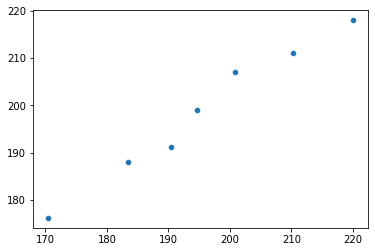

In [64]:
# prob 4.4
x = [200.8, 194.6, 183.5, 190.5, 210.2, 170.5, 220.0]
y = [207.0, 199.0, 188.0, 191.2, 211.0, 176.2, 218.0]
n = len(x)
# 1
sns.scatterplot(x=x, y=y);

y = 28.335917511319934 + 0.8700449437418878x


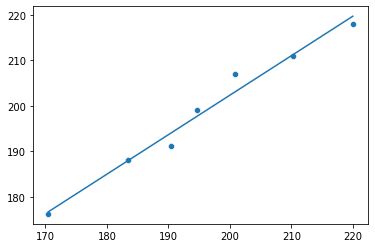

In [67]:
# 2
x_bar = np.mean(x) ; y_bar = np.mean(y) ;
s_xx = np.std(x, ddof=1)**2 * (len(x)-1)
s_yy = np.std(y, ddof=1)**2 * (len(y)-1)
s_xy = np.sum(np.multiply(x, y)) - np.sum(x) * np.sum(y) / n

beta_1 = s_xy / s_xx ; beta_0 = y_bar - beta_1 * x_bar
y_hat = beta_0 + np.multiply(beta_1, x)
sse = np.sum(np.diff([y_hat, y], axis=0)**2)
var_hat = sse / (len(y_hat)-2)
s_hat = np.sqrt(var_hat)
print(f"y = {beta_0} + {beta_1}x")

sns.scatterplot(x=x, y=y);
sns.lineplot(x=x, y=y_hat);
plt.show()

In [62]:
# 3
alpha = 0.05
t_alpha = stats.t.ppf(1-alpha/2, df=n-2)
print(beta_1, t_alpha * s_hat / np.sqrt(s_xx))

0.8700449437418878 0.15324471083149466


In [68]:
# prob 4.6
# 1
n = 15 ; x_bar = 10.8 ; y_bar = 122.7
s_xx = 70.6 ; s_yy = 98.5 ; s_xy = 68.3

beta_1 = s_xy / s_xx ; beta_0 = y_bar - beta_1 * x_bar
print(f"y = {beta_0} + {beta_1}x")

y = 112.25184135977338 + 0.9674220963172805x


In [70]:
# 2
sse = s_yy - s_xy**2 / s_xx ; print(sse)
var_hat = sse / (n-2); print(var_hat)

32.425070821529744
2.4942362170407497


In [72]:
# 3
beta_1 * 1

0.9674220963172805

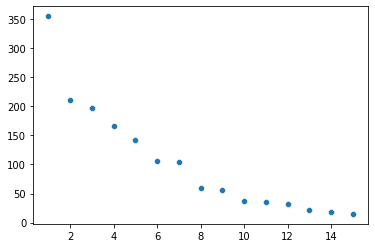

In [76]:
# prob 4.8
# 1
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y = [355,211,197,166,142,106,104,60,56,38,36,32,21,19,15]

sns.scatterplot(x=x,y=y);

In [79]:
# 2
x_bar = np.mean(x) ; y_bar = np.mean(y) ; n = len(x)
s_xx = np.std(x, ddof=1)**2 * (len(x)-1)
s_yy = np.std(y, ddof=1)**2 * (len(y)-1)
s_xy = np.sum(np.multiply(x, y)) - np.sum(x) * np.sum(y) / n

beta_1 = s_xy / s_xx ; beta_0 = y_bar - beta_1 * x_bar
print(f"y = {beta_0} + {beta_1} x")

y = 259.58095238095234 + -19.46428571428571 x


In [80]:
# 3
print(beta_0 + beta_1 * 19)

-110.24047619047616


## 13.5 선형관계의 강도
> $$ y_i \quad = \quad \hat{y_i} \quad + \quad e_i = (\hat{\beta_0}) \quad + \quad (y_i-\hat{\beta_0}-\hat{\beta_1}x_i) \\ 관측된\ 종속변수 \quad = \quad 선형관계로\ 설명되는\ y부분 \quad + \quad 선형관계로 \ 설명되지\ 않는\ 부분 \\ (SST) \quad = \quad (SSR) \quad + \quad (SSE) $$
- 모든 관측점이 직선 위에 놓이는 경우, 잔차 $e_i$는 모두 0이 되고, y값은 x로 표현되는 선형관계로 완전히 설명될 수 있다. 따라서 잔차들이 값이 0으로부터 멀어질수록 선형관계가 약하다고 할 수 있는데
$$ SSE = \sum e^2_i =\sum(y_i-\hat{\beta_0}-\hat{\beta_1}x_i)^2=S_{yy}-\frac{S_{xy}^2}{S_{xx}}$$
는 자료의 전체적인 경향이 선형관계에서 얼만큼 벗어났는가 측정하는 값으로 해석 가능
- 자료의 y값들이 나타내는 변동의 크기는 총제곱합(total sum of squares) $$ SST = S_{yy}=\sum(y_i-\bar{y})^2$$ 로 측정될 수 있고, 
$$S_{yy}=(S_{yy}-\frac{S_{xy}^2}{S_{xx}})+\frac{S_{xy}^2}{S_{xx}}=SSE+\frac{S_{xy}^2}{S_{xx}} = \sum(y_i-\hat{y_i})^2 + \sum(\hat{y_i}-\bar{y})^2$$ 를 통하여, SSE가 y의 총 변동 SST의 한 부분을 형성함을 알 수 있다.
- 이때, $SSR = \frac{S_{xy}^2}{S_{xx}}$을 자료의 y값들의 총 변동 중에서 회귀모형에 의해서 설명될 수 있는 부분이라고 해석가능한데 이를 SSR (회귀제곱합)이라고 한다.
- 선형모형이 주어진 자료에 적합하다는 것은 SSR이 SST의 대부분에 해당된다. 회귀모형을 고려하지 않는다면, 종속변수의 예측값으로 평균$\bar{y}$를 사용할 것이고, 이러한 예측값을 사용하는데 따른 오차의 제곱합 SSE는 SST자체가 될 것.
> **결정계수 : 선형모형이 어느정도 적합한가의 측도**
> $$R^2=\frac{SSR}{SST}=\frac{S_{xy}^2}{S_{xx}S_{yy}}=1-\frac{SSE}{SST}$$
- 결정계수의 값은 항상 0~1
- 표본상관계수 $\gamma = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}$로서, $R^2$는 표본상관계수의 제곱 => 결정계수의 값이 1에 가까울 수록, 산점도에서 관측점들이 직선 주위에 가깝게 몰려있고, 선형회귀모형이 관측결과를 잘 설명해준다고 할 수 있다.
- $R^2$가 0에 가까운 경우
    1) 산점도에서 특별한 경향이 안 보이는 경우 => 더 좋은 모형 기대 불가
    2) 산점도에서 관측점들이 곡선 경향을 보이는 경우 => 비선형모형 고려 필요

In [81]:
# example 8
x = [3,3,4,5,6,6,7,8,8,9]
y = [9,5,12,9,14,16,22,18,24,22]

x_bar = np.mean(x) ; y_bar = np.mean(y) ; n = len(x)
s_xx = np.std(x,ddof=1) ** 2 * (len(x)-1)
s_yy = np.std(y,ddof=1) ** 2 * (len(y)-1)
s_xy = np.sum(np.multiply(x,y)) - np.sum(x) * np.sum(y)/len(y)

beta_1 = s_xy / s_xx ; beta_0 = y_bar - beta_1 * x_bar
r2 = s_xy ** 2/ (s_xx * s_yy); r2

0.8283828208791015

In [87]:
# prob 5.2

s_xx = 10.1 ; s_yy = 16.5 ; s_xy = 9.3
r2 = s_xy**2 / (s_xx * s_yy); r2

0.5189918991899191

In [91]:
# prob 5.4
x = [0,1,6,3,5] ; y = [4,3,0,2,1] ; n = len(y)
# 1
x_bar = np.mean(x) ; y_bar = np.mean(y)
s_xx = np.sum(np.power(x, 2)) - n * x_bar**2
s_yy = np.sum(np.power(y, 2)) - n * y_bar**2
s_xy = np.sum(np.multiply(x,y)) - n * x_bar * y_bar
r2 = s_xy ** 2 / (s_xx * s_yy); r2

0.9846153846153847

In [95]:
# 2
gamma = s_xy / np.sqrt(s_xx * s_yy)
gamma

-0.9922778767136677

In [ ]:
# 3


In [35]:
# example 9
height = [181, 161, 170, 160, 158, 168, 162, 179, 183, 178, 171, 177, 163, 
          158, 160, 160, 158, 173, 160, 163, 167, 165, 163, 173, 178, 170, 
          167, 177, 175, 169,152, 158, 160, 160, 159, 180, 169, 162, 178, 
          173, 173, 171, 171, 170, 160, 167, 168, 166, 164, 173, 180]

weight = [78,49,52,53,50,57,53,54,71,73,55,73,51,53,65,48,59,64,48,53,78,
          45,56,70,68,59,55,64,59,55,38,45,50,46,50,63,71,52,74,52,61,65,
          68,57,47,48,58,59,55,74,74]

data = pd.DataFrame({'height':height, 'weight':weight})
fit = sm.ols('weight ~ height', data=data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     58.01
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           7.40e-10
Time:                        21:59:12   Log-Likelihood:                -168.30
No. Observations:                  51   AIC:                             340.6
Df Residuals:                      49   BIC:                             344.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -100.7820     20.912     -4.819      0.000    -142.806     -58.758
height         0.9479      0.124      7.616      0.000       0.698       1.198
==============================================================================
Omnibus:                        5.480   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.425
Skew:                           0.569   Prob(JB):                        0.109
Kurtosis:                       3.886   Cond. No.                     3.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
fit.conf_int(0.05)

,0,1
Intercept,-142.806014,-58.757955
height,0.697793,1.197985


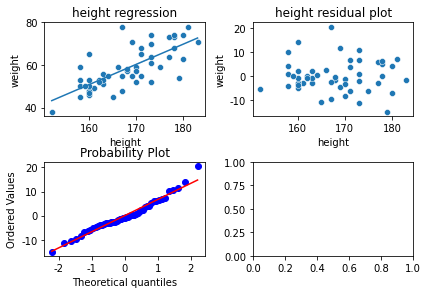

In [37]:
font_name = font_manager.FontProperties().get_name()
rc('font', family=font_name, size=10)
rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(nrows=2,ncols=2)
slope, intercept = np.polyfit(height, weight, 1)
abline_values = [slope * i + intercept for i in height]
data = pd.DataFrame([height, weight, abline_values]).T.rename(columns={0:'height', 1:'weight', 2:'abline_values'})
fig1_1 = sns.lineplot(x="height", y="abline_values", data=data, ax=axes[0,0]);
fig1_1.set_title("height regression")
fig1_1.set_xlabel('height')
fig1_1.set_ylabel('weight')
fig1_2 = sns.scatterplot(x='height', y='weight', data=data, ax=axes[0,0]);
plt.tight_layout()

r = fit.resid
fig2 = sns.scatterplot(x=height, y=r, ax=axes[0,1]);
fig2.set_title('height residual plot')
fig2.set_xlabel("height")
fig2.set_ylabel('weight')
plt.tight_layout()

fig3 = stats.probplot(r, dist='norm', plot=axes[1,0])
# fig3.title("redisuals normal prob plot")
# plt.title("redisuals normal prob plot")
plt.show()
